# Importação Bibliotecas

In [ ]:
import pandas as pd
import matplotlib
import plotly.express as px
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dados 
O dataset foi gerado no site [paineldeprecos](https://paineldeprecos.planejamento.gov.br/analise-materiais) 
<br>O painel de compras é uma ferramenta desenvolvida pelo Ministério do
Planejamento que disponibiliza, de forma clara e de
fácil leitura, dados e informações de compras públicas
homologadas.
<br>Há vários filtros para a geração dos dados, é necessario escolher no minimo três filtros.
<br>Dados coletados:
* Compras realizadas em 2021
* Esfera Federal
* Materiais:
    Vassoura, Caneta Esferográfica, Papel Higiênico, Água mineral Natural, Caderno, Álcool Isopropílico


In [156]:
df_painel_1 = pd.read_excel('/content/drive/My Drive/dados_painel/dados_precos.xlsx')
df_painel_2 = pd.read_excel('/content/drive/My Drive/dados_painel/precos.xlsx')

In [157]:
df_painel = pd.concat([df_painel_1,df_painel_2])
df_painel.reset_index(drop=True, inplace=True)

## **1. Tratamento dos dados**

Modificando todos os nomes das colunas

In [158]:
df_painel.rename(columns={'Identificação da Compra': 'Id_compra', 'Número do Item': 'Nr_item', 'Modalidade': 'modalidade', 
                              'Código do CATMAT': 'cod_CATMAT', 'Descrição do Item': 'desc_item', 'Unidade de Fornecimento': 'Un_fornecimento',
                              'Quantidade ofertada': 'Qtd_ofertada','Valor unitário': 'vlr_unitario', 'Fornecedor': 'fornecedor','Órgão':'orgao',
                               'UASG - Unidade Gestora': 'Un_gestora', 'Data da Compra': 'data_compra', }, inplace = True)

Removendo coluna desnecessário 

In [159]:
df_painel.drop('Unnamed: 0',inplace=True,axis=1)

Modificando o tipo da coluna para inteiro

In [160]:
df_painel['Qtd_ofertada'] = df_painel.Qtd_ofertada.replace(to_replace='[.]', value ='',regex=True)
df_painel.Qtd_ofertada = df_painel.Qtd_ofertada.astype(int)

In [161]:
df_painel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744 entries, 0 to 2743
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Id_compra        2744 non-null   object        
 1   Nr_item          2744 non-null   int64         
 2   modalidade       2744 non-null   object        
 3   cod_CATMAT       2744 non-null   int64         
 4   Un_fornecimento  2744 non-null   object        
 5   Qtd_ofertada     2744 non-null   int64         
 6   vlr_unitario     2744 non-null   float64       
 7   fornecedor       2744 non-null   object        
 8   orgao            2744 non-null   object        
 9   Un_gestora       2744 non-null   object        
 10  data_compra      2744 non-null   datetime64[ns]
 11  desc_item        2744 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 257.4+ KB


In [162]:
df_painel.describe()

,Nr_item,cod_CATMAT,Qtd_ofertada,vlr_unitario
count,2744.000000,2744.000000,2.744000e+03,2744.000000
mean,43.587464,322312.555029,5.354614e+03,17.452764
std,62.034392,118318.953140,5.535192e+04,132.639923
min,1.000000,32859.000000,1.000000e+00,0.010000
25%,6.000000,234645.000000,8.000000e+01,0.920000
50%,19.000000,318938.000000,4.500000e+02,5.305000
75%,54.000000,444390.000000,1.830000e+03,13.645000
max,476.000000,481234.000000,1.994100e+06,6089.950000


In [163]:
df_painel.head()

,Id_compra,Nr_item,modalidade,cod_CATMAT,Un_fornecimento,Qtd_ofertada,vlr_unitario,fornecedor,orgao,Un_gestora,data_compra,desc_item
0,00160/2021,1,Dispensa de Licitação,151014,UNIDADE,1,6089.95,N & N COMERCIO DE PRODUTOS LTDA,COMANDO DA MARINHA,786810 - CENTRO DE INTENDENCIA DA MARINHA EM L...,2021-10-20,VASSOURA
1,00030/2021,7,Dispensa de Licitação,443004,"FARDO 64,00 UN",10,168.00,"WA - ARTIGOS DE PAPELARIA, COMERCIO E SERVICOS...","MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",130081 - 10 DISTRITO DE METEOROLOGIA DE GOIANIA,2021-12-31,PAPEL HIGIÊNICO
2,00013/2021,38,Pregão,392369,SACHÊ,5,163.60,MERCOSCIENCE COMERCIAL LTDA,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,135026 - EMBRAPA INSTRUMENTAÇÃO/SÃO CARLOS/SP,2021-12-17,ÁLCOOL ISOPROPÍLICO
3,00011/2021,16,Pregão,407762,EMBALAGEM 1 L,1,151.00,MERCK S/A,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,135032 - EMBRAPA TRIGO/PASSO FUNDO/RS,2021-12-14,ÁLCOOL ISOPROPÍLICO
4,00147/2021,11,Dispensa de Licitação,481234,UNIDADE,2,150.00,VILA PISCINAS COM. DE EQUIPAMENTOS EIRELI,COMANDO DO EXERCITO,160093 - 38 BATALHAO DE INFANTARIA/MEX/ES,2021-12-17,VASSOURA


Removendo linhas duplicadas

In [164]:
print('Tamanho: ',len(df_painel))
df_painel = df_painel.drop_duplicates()
print('Tamanho após remover duplicados: ',len(df_painel))

Tamanho:  2744
Tamanho após remover duplicados:  2644


## Quantidade de processos de Compra por material

In [165]:
x1 = df_painel.groupby('desc_item')['Id_compra'].nunique().to_frame()
x1 = x1.sort_values(by= 'Id_compra',ascending=False)


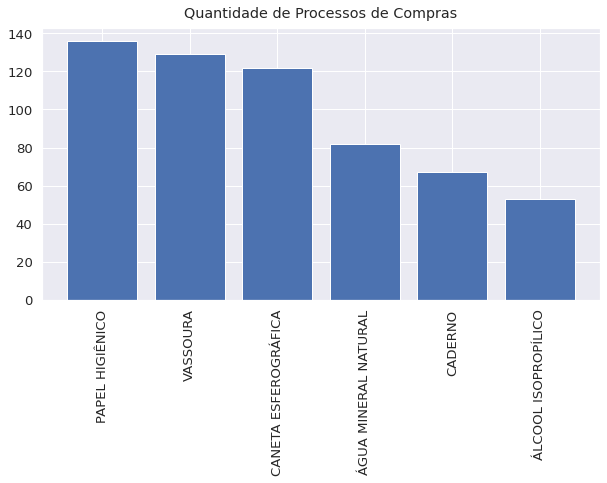

In [166]:
figure, ax = plt.subplots(figsize=(10, 5))
plt.xticks(rotation='vertical')
plt.bar(x1.index, x1['Id_compra'])
plt.title('Quantidade de Processos de Compras',pad=10)
plt.show()

## Valor de compra por material

In [167]:
df_painel['total'] = df_painel['Qtd_ofertada'] * df_painel['vlr_unitario']

In [168]:
df_bar = df_painel.pivot_table(index='desc_item', values='total', aggfunc='sum').reset_index()

In [169]:
df_bar

,desc_item,total
0,CADERNO,2.750611e+06
1,CANETA ESFEROGRÁFICA,1.495440e+06
2,PAPEL HIGIÊNICO,1.969987e+07
3,VASSOURA,3.689875e+06
4,ÁGUA MINERAL NATURAL,2.650071e+06
5,ÁLCOOL ISOPROPÍLICO,1.496413e+06


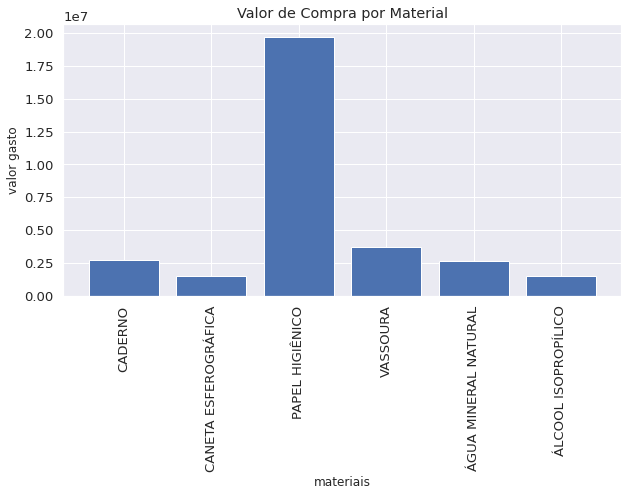

In [170]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','total',data=df_bar)
plt.title('Valor de Compra por Material')
plt.xlabel('materiais',fontsize=12)
plt.ylabel('valor gasto',fontsize=12)
plt.show()

In [173]:
df_bar = df_painel.pivot_table(index='desc_item', values='total', aggfunc='sum').reset_index()
x2 = df_bar.loc[(df_bar['desc_item'] != 'VASSOURA') & (df_bar['desc_item'] != 'PAPEL HIGIÊNICO')]
x2

,desc_item,total
0,CADERNO,2.750611e+06
1,CANETA ESFEROGRÁFICA,1.495440e+06
4,ÁGUA MINERAL NATURAL,2.650071e+06
5,ÁLCOOL ISOPROPÍLICO,1.496413e+06


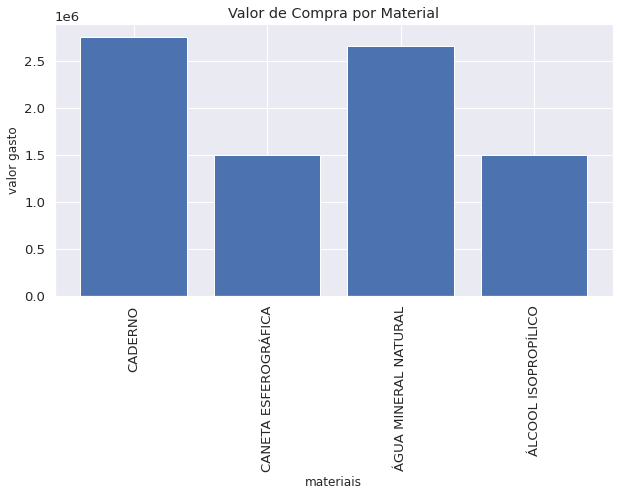

In [175]:
plt.figure(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar('desc_item','total',data=x2)
plt.title('Valor de Compra por Material')
plt.xlabel('materiais',fontsize=12)
plt.ylabel('valor gasto',fontsize=12)
plt.show()

## Média/Mediana de preços por período

In [176]:
df_mean=df_painel.pivot_table(index='data_compra', columns='desc_item', values='vlr_unitario', aggfunc='mean')
df_mean

desc_item,CADERNO,CANETA ESFEROGRÁFICA,PAPEL HIGIÊNICO,VASSOURA,ÁGUA MINERAL NATURAL,ÁLCOOL ISOPROPÍLICO
data_compra,,,,,,
2021-01-06,NaN,NaN,48.630000,6.995000,NaN,NaN
2021-01-07,NaN,NaN,16.700000,8.101250,NaN,5.31
2021-01-09,NaN,NaN,31.661667,21.014000,NaN,NaN
2021-01-10,NaN,NaN,2.445000,8.588000,NaN,NaN
2021-01-12,NaN,NaN,3.900000,14.130000,NaN,51.81
...,...,...,...,...,...,...
2021-12-27,9.400,1.150000,18.437500,16.933333,0.710000,NaN
2021-12-28,5.650,0.979975,NaN,NaN,16.300000,63.90
2021-12-29,8.665,1.270000,42.400000,4.926667,0.826667,NaN


In [177]:
fig=px.line(df_mean, facet_row='desc_item', markers=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(legend_title="Média de preços")

In [178]:
df_median=df_painel.pivot_table(index='data_compra', columns='desc_item', values='vlr_unitario', aggfunc='median')
df_median

desc_item,CADERNO,CANETA ESFEROGRÁFICA,PAPEL HIGIÊNICO,VASSOURA,ÁGUA MINERAL NATURAL,ÁLCOOL ISOPROPÍLICO
data_compra,,,,,,
2021-01-06,NaN,NaN,64.800,6.995,NaN,NaN
2021-01-07,NaN,NaN,3.835,7.695,NaN,5.31
2021-01-09,NaN,NaN,26.950,13.450,NaN,NaN
2021-01-10,NaN,NaN,2.445,8.000,NaN,NaN
2021-01-12,NaN,NaN,3.900,9.800,NaN,51.81
...,...,...,...,...,...,...
2021-12-27,9.400,1.15000,6.610,17.900,0.71,NaN
2021-12-28,5.650,1.09495,NaN,NaN,16.30,63.90
2021-12-29,8.665,0.72000,42.400,4.220,0.85,NaN


In [179]:
fig=px.line(df_median, facet_row='desc_item', markers=True)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_layout(legend_title="Mediana de preços")

## Quantidade de Fornecedores por Material

In [180]:
x = df_painel.groupby('desc_item')['fornecedor'].nunique()

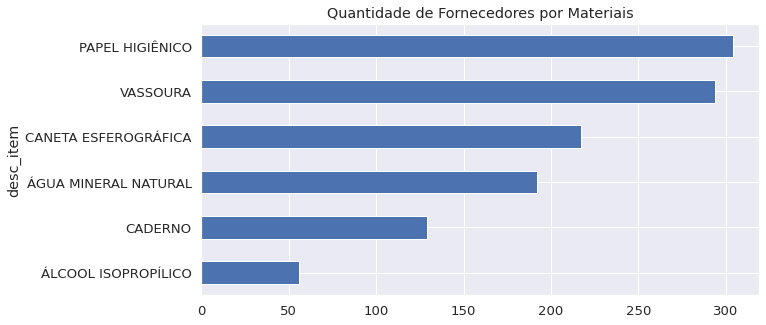

In [181]:
x.sort_values(ascending=True).plot(kind='barh',figsize = (10, 5),title='Quantidade de Fornecedores por Materiais');

  ## Modalidade em que a compra foi realizada

In [182]:
df_modalidade = df_painel.modalidade.value_counts().to_frame()

In [183]:
df_modalidade

,modalidade
Pregão,2017
Dispensa de Licitação,626
Inexigibilidade de Licitação,1


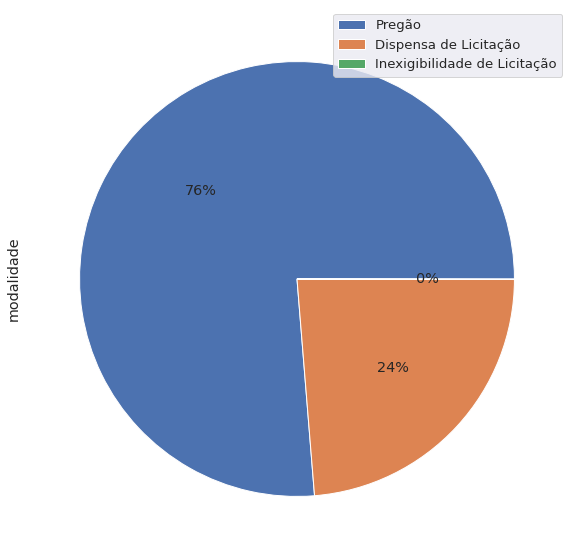

In [184]:
df_modalidade.plot(y='modalidade', kind='pie', autopct='%1.0f%%', labeldistance=None, figsize=(15,10));

## Distribuição do valor unitário por Itens

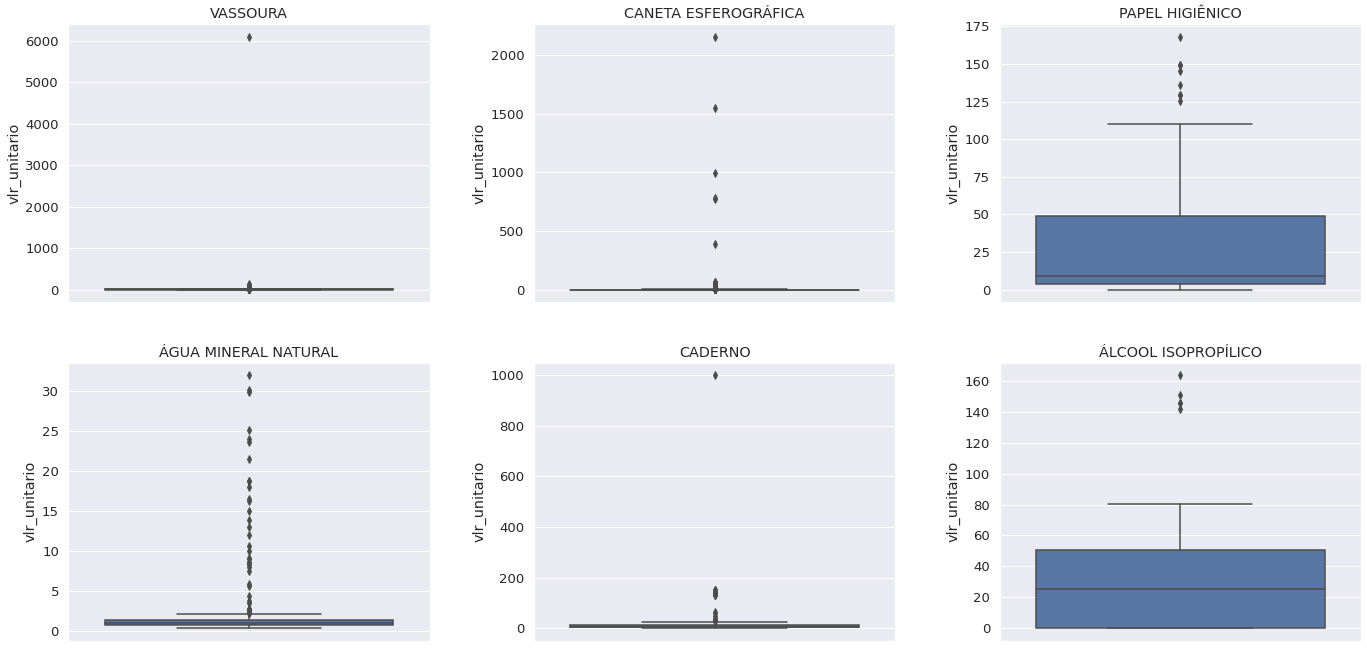

In [185]:
materiais = [['VASSOURA','CANETA ESFEROGRÁFICA','PAPEL HIGIÊNICO',],
                    ['ÁGUA MINERAL NATURAL','CADERNO','ÁLCOOL ISOPROPÍLICO']]
                     

sns.set(font_scale=1.2)
fig, eixo = plt.subplots(2,3,figsize=(20,10))

for linha in range(2):
    for coluna in range(3):
      df_material = df_painel[df_painel.desc_item == materiais[linha][coluna] ]
      ax = sns.boxplot(data=df_material,y='vlr_unitario',ax=eixo[linha][coluna])
      ax.set_title(materiais[linha][coluna])

fig.tight_layout(pad=3)

## Dispersão por Item de Compra

Quantidade X Preço Total

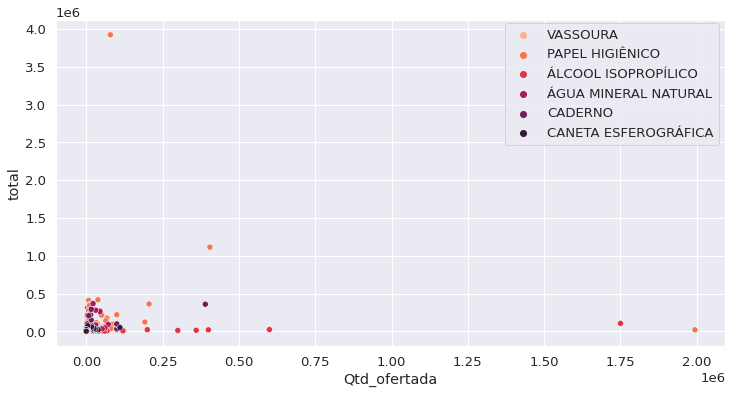

In [186]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_painel, x='Qtd_ofertada', y='total', hue='desc_item', palette='rocket_r')

plt.legend(bbox_to_anchor=(1,1.01));

Quantidade X Preço unitário

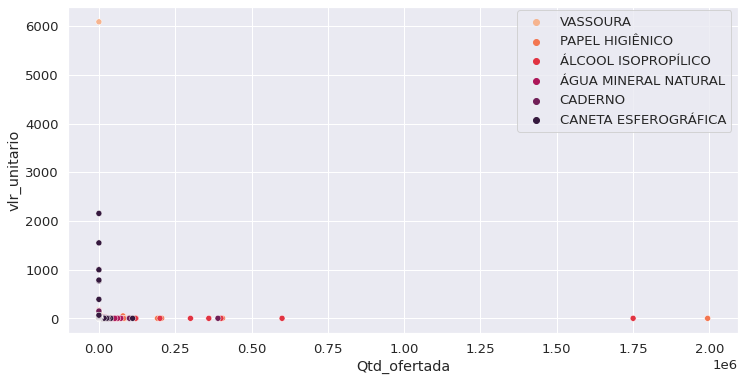

In [187]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_painel, x='Qtd_ofertada', y='vlr_unitario', hue='desc_item', palette='rocket_r')

plt.legend(bbox_to_anchor=(1,1.01));

## Compras dos Itens por período

In [188]:
df_compras = df_painel.pivot_table(index='data_compra', columns='desc_item', values='total', aggfunc='sum')
fig=px.line(df_compras, title='Compras no ano 2021 por Itens')

fig.update_layout(xaxis_title=None,
    yaxis_title="Valor total comprado",
    legend_title="Itens",
    title={
        'y':0.85,
        'x':0.27,
        'font_family': 'Times New Roman',
        'font_color': 'black'
    })


## Top 5 Órgãos que mais compraram

In [189]:
df_top = df_painel.orgao.value_counts()[:5].to_frame()

In [190]:
df_top

,orgao
COMANDO DO EXERCITO,882
COMANDO DA MARINHA,306
COMANDO DA AERONAUTICA,215
EMPRESA BRASILEIRA DE SERVIÇOS HOSPITALARES,87
FUNDACAO NACIONAL DO INDIO,69


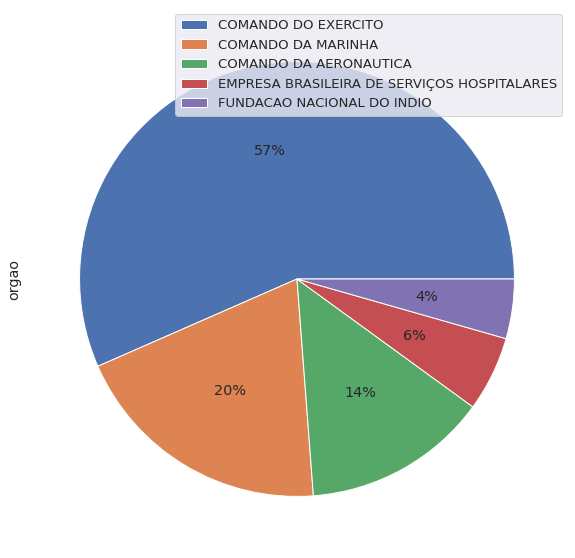

In [191]:
df_top.plot(y='orgao', kind='pie', autopct='%1.0f%%', labeldistance=None, figsize=(15,10));

## Variação dos preços para Itens do mesmo Fornecedor por período

In [192]:
grouped = df_painel.groupby(['fornecedor','desc_item'])

In [193]:
filtro = grouped.filter(lambda x: len(x) >= 20)

In [194]:
df_novo = pd.DataFrame()
df_novo['fornecedor'] = filtro.fornecedor
df_novo['desc_item'] = filtro.desc_item
df_novo['vlr_unitario'] = filtro.vlr_unitario
df_novo['Qtd_ofertada'] = filtro.Qtd_ofertada
df_novo['data_compra'] = filtro.data_compra

In [195]:
grouped_2 = df_novo.groupby(['fornecedor','desc_item'])

In [196]:
for name, group in grouped_2:
  print(name)
  print(len(group))

('MULTISUL COMERCIO E DISTRIBUICAO LTDA', 'VASSOURA')
21
('RAFA PAPER DISTRIBUIDORA EIRELI', 'CANETA ESFEROGRÁFICA')
25
('RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA')
80


Pegando os Fornecedores com mais dados por itens

In [197]:
df_1 = pd.DataFrame()
df_2 = pd.DataFrame()
for name, group in grouped_2:
  if name == ('RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA'):
    df_1 = group
  if name ==  ('MULTISUL COMERCIO E DISTRIBUICAO LTDA', 'VASSOURA'):
    df_2 = group

Boxplot: RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA

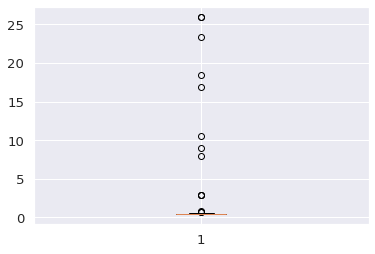

In [198]:
plt.boxplot(df_1['vlr_unitario']);

Boxplot: MULTISUL COMERCIO E DISTRIBUICAO LTDA X	VASSOURA

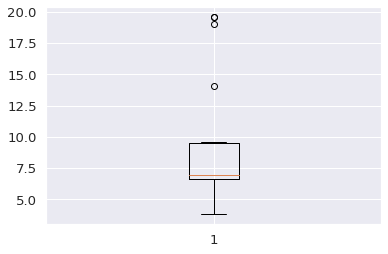

In [199]:
plt.boxplot(df_2['vlr_unitario']);

Grafico de linha por periodo

RC RAMOS COMERCIO LTDA', 'CANETA ESFEROGRÁFICA

In [200]:
df_total=df_1.pivot_table(index='data_compra', values='vlr_unitario', aggfunc='sum')
fig=px.line(x=df_total.index, y=df_total['vlr_unitario'])
fig.update_layout(
    xaxis_title={
        'text':'Data',
    },
    yaxis_title={
        'text': 'Valor',
    },
    font_color='grey',
    title={
        'x': 0.5,
        'y': 0.93,
    },
    template='ggplot2'
)

MULTISUL COMERCIO E DISTRIBUICAO LTDA X	VASSOURA

In [201]:
df_total=df_2.pivot_table(index='data_compra', values='vlr_unitario', aggfunc='sum')
fig=px.line(x=df_total.index, y=df_total['vlr_unitario'])
fig.update_layout(
    xaxis_title={
        'text':'Data',
    },
    yaxis_title={
        'text': 'Valor',
    },
    font_color='grey',
    title={
        'x': 0.5,
        'y': 0.93,
    },
    template='ggplot2'
)